In [1]:
import pickle
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt
%matplotlib inline

import flayer
import particle_evolution
import feo_thermodynamics as feot
import multiprocessing
import bulk_case_runner

# We have some annoying warnings - I think from llvm bug - fix then remove this
import warnings
warnings.filterwarnings("ignore")

In [2]:
base_parameters = {'f_layer_thickness': 200.0E3,
                    'delta_t_icb': 10.0,
                    'xfe_outer_core': 0.92,
                    'xfe_icb': 0.92,
                    'growth_prefactor': 150.0,
                    'chemical_diffusivity': 1.0E-9,
                    'kinematic_viscosity': 1.0E-6,
                    'i0': 1.0E-10,
                    'surf_energy': 1.08E-2, 
                    'number_of_analysis_points': 200,
                    'r_icb': 1221.5E3, 
                    'r_cmb': 3480.0E3,
                    'gruneisen_parameter': 1.5}

# Just runs in serial
data = bulk_case_runner.run_flayer_case(base_parameters, "base_case.pickle")
print("Done, inner core growth rate is", data["growth_rate"], "km/Myr")
print("Max vf_ratio is", data["vf_ratio"].max())


Done, inner core growth rate is 16.15632934419563 km/Myr
Max vf_ratio is 9.820868684020741e-05


In [3]:
# Bunch of cases, two at a time

cases = []

for dl in [1.0E-7, 5.0E-8, 1.0E-8, 5.0E-9]:
    name = f"{dl:.3e}_dl_case"
    input_parameters = dict(base_parameters)
    input_parameters["chemical_diffusivity"] = dl
    cases.append((name, input_parameters))
    
with multiprocessing.Pool(processes=2) as pool:
    pool.map(bulk_case_runner.case_handler, cases)

5.000e-08_dl_case: growth rate 10801.239621263363 km/Myrm ax vf_ratio 0.02396667113319714
1.000e-08_dl_case: growth rate 847.8585400372062 km/Myrm ax vf_ratio 0.0029127242385376894
1.000e-07_dl_case: growth rate 19966.389110428594 km/Myrm ax vf_ratio 0.03839199123624253
5.000e-09_dl_case: growth rate 257.4899347621534 km/Myrm ax vf_ratio 0.0010606338932439123


Temperature at CMB is 4091.0000127665962 K
Temberature at top of F-layer is 5495.375594101565 K
Temberature at ICB is 5560.445773134292 K


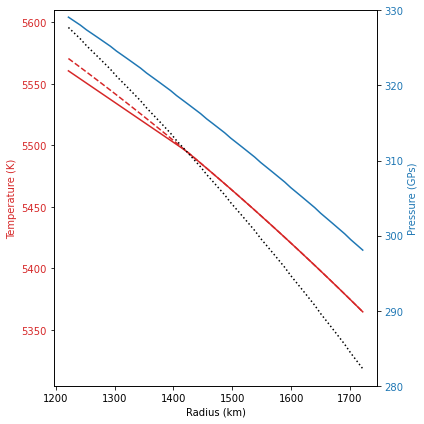

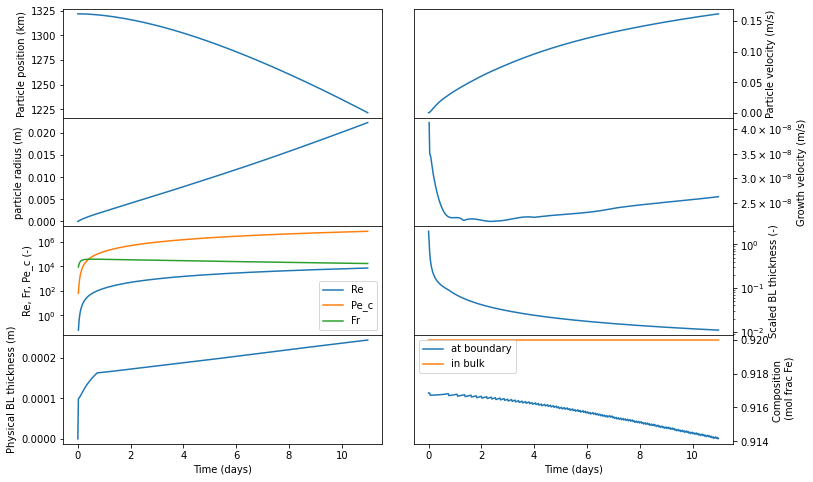

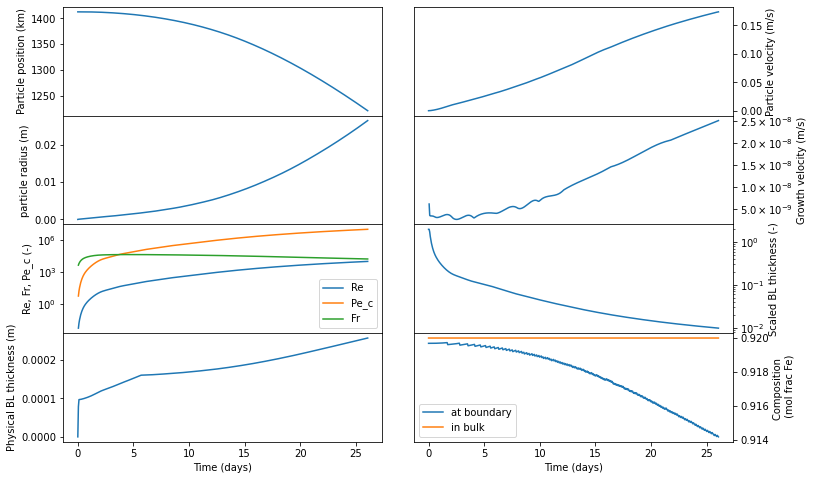

Particle radii between 0.0266 and 9.07e-06 m


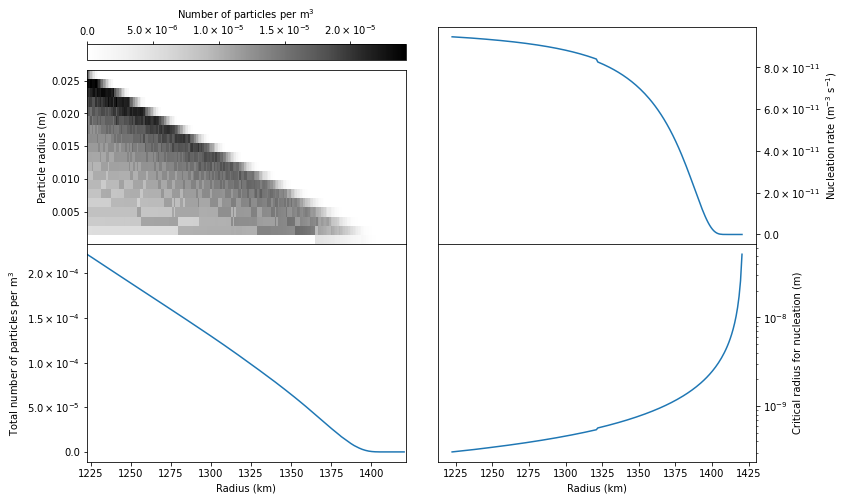

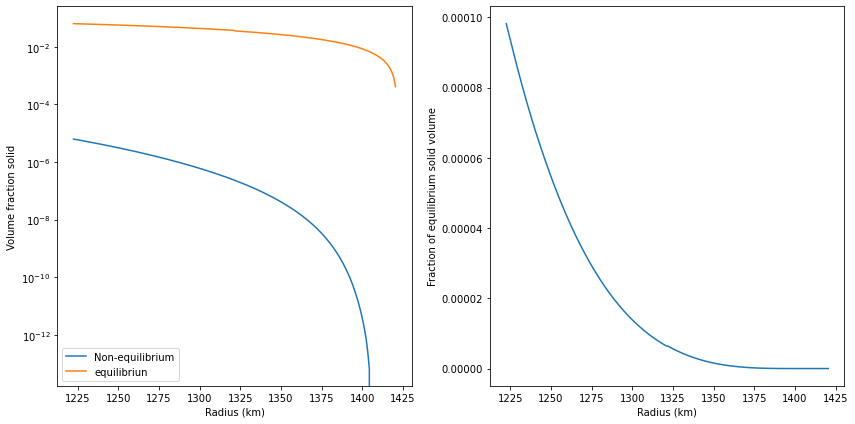

In [8]:
data_from_file = bulk_case_runner.load_case_data("base_case.pickle")
# Plot P-T-R for reference. This is slow
bulk_case_runner.plot_case_setup(**data_from_file)
# Plot solution from 'middle' of layer
bulk_case_runner.plot_case_single_solution(100, data_from_file)
# Crystal density and nucleation
bulk_case_runner.plot_case_csd_nuc(**data_from_file)
bulk_case_runner.plot_case_solid_frac(**data_from_file)

Temperature at CMB is 4091.0000127665962 K
Temberature at top of F-layer is 5495.375594101565 K
Temberature at ICB is 5560.445773134292 K


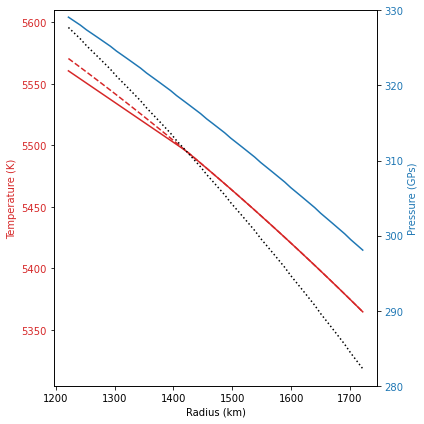

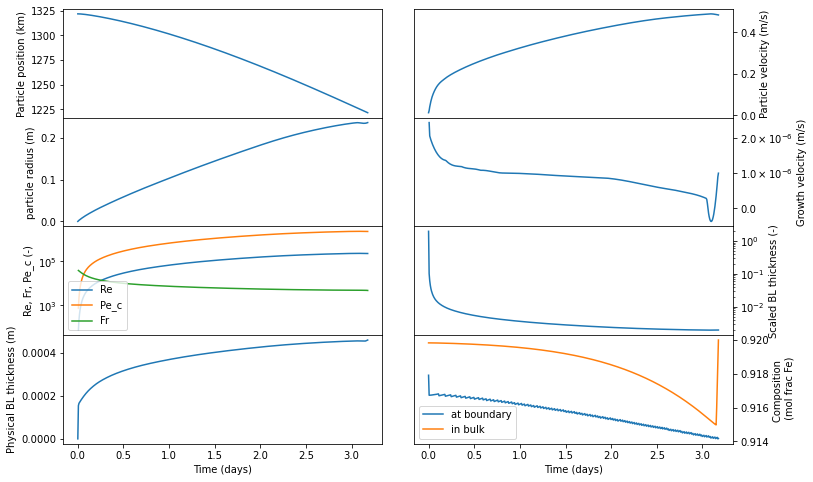

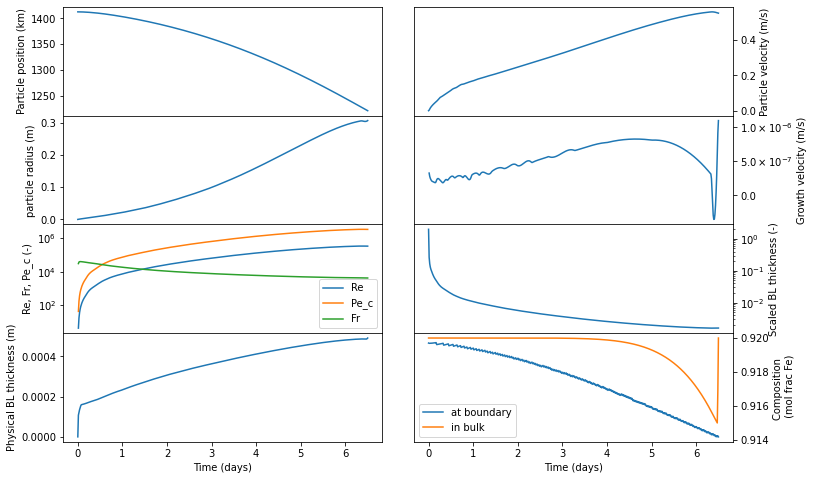

Particle radii between 0.318 and 2.82e-05 m


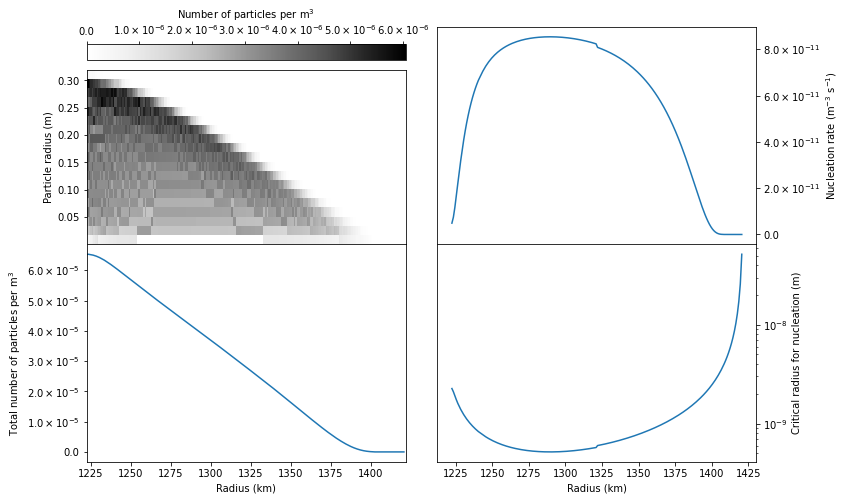

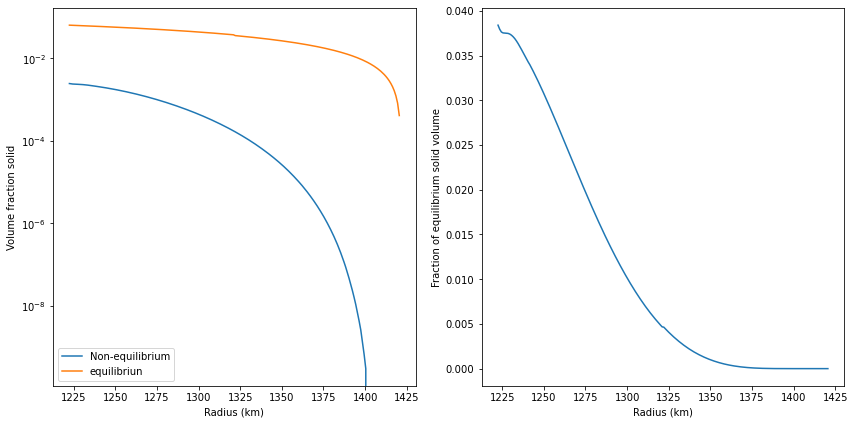

In [9]:
data_from_file = bulk_case_runner.load_case_data("1.000e-07_dl_case.pickle")
# Plot P-T-R for reference. This is slow
bulk_case_runner.plot_case_setup(**data_from_file)
# Plot solution from 'middle' of layer
bulk_case_runner.plot_case_single_solution(100, data_from_file)
bulk_case_runner.plot_case_single_solution(190, data_from_file)
# Crystal density and nucleation
bulk_case_runner.plot_case_csd_nuc(**data_from_file)
bulk_case_runner.plot_case_solid_frac(**data_from_file)

In [7]:
# Bunch of cases, two at a time

cases = []

for dl in [1.0E-8, 1.0E-9, 1.0E-11]:
    name = f"{dl:.3e}_i0_case"
    input_parameters = dict(base_parameters)
    input_parameters["chemical_diffusivity"] = dl
    cases.append((name, input_parameters))
    
with multiprocessing.Pool(processes=4) as pool:
    pool.map(bulk_case_runner.case_handler, cases)

1.000e-11_i0_case: growth rate 0.013496776813590036 km/Myrm ax vf_ratio 4.3348522777269765e-07
1.000e-09_i0_case: growth rate 16.15632934419563 km/Myrm ax vf_ratio 9.820868684020741e-05
1.000e-08_i0_case: growth rate 847.8585400372062 km/Myrm ax vf_ratio 0.0029127242385376894
